In [1]:
# Read and structure experiment data csv
import csv
import numpy as np

exp_data = []
num_max_traders = 32

filenamestr='multitrial_snashall.csv'
exp_data = {}
exp_data["base"] = []
exp_data["enhanced"] = []
with open(filenamestr) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        subtrial = {}
        if line_count == 0:
            line_count += 1
        else:
            # subtrial{trial_id, duration, AA{}, GDX{}, ZIP{}, SNPR{}}
            subtrial["trial_id"] = row[0]
            subtrial["duration"] = row[1]
            csv_column_offset   = 2
            num_cols_per_trader = 4
            sum_trader_nums = 0
            j = 0
            # trader_stats{balance, num_traders, profit_per}
            while (sum_trader_nums < num_max_traders and "base" in subtrial["trial_id"]) or (sum_trader_nums < num_max_traders+2 and "enhanced" in subtrial["trial_id"]):
                row_id = j * num_cols_per_trader + csv_column_offset
                trader_type                 = row[row_id]
                trader_stats = {}
                trader_stats["balance"]     = float(row[row_id + 1])
                if row[row_id + 2] == ' ':
                    trader_stats["num_traders"] = 0
                else:
                    trader_stats["num_traders"] = int(row[row_id + 2])
                sum_trader_nums += trader_stats["num_traders"]
                trader_stats["profit_per"]  = float(row[row_id + 3])
                subtrial[trader_type] = trader_stats
                j += 1

            line_count += 1
            if "base" in subtrial["trial_id"]:
                exp_data["base"].append(subtrial)
            elif "enhanced" in subtrial["trial_id"]: 
                exp_data["enhanced"].append(subtrial)
# Reference guide to experiment data structure:
# exp_data[s_d_schedule_num]["base/enhanced"][trial_num]["trial_id/duration/AA/GDX/ZIP/SNPR"]['profit_per']
# if trader_code last field is a dict [balance/num_traders/profit_per]
print('Reading in completed.')

Reading in completed.


In [2]:
avg_enhanced_profit  = []
avg_all_profit       = []
avg_even_prob_profit = []
enhanced_types       = []
best_trial_types     = []
avg_extra_profit     = []
real_best_profit     = []
types = [" AA", " GDX", " ZIP", " SNPR"]
types_without_spaces = ["AA", "GDX", "ZIP", "SNPR"]
num_trials_per = 10
tot_trader_num = 32

def zero_profit_accumulators():
    base_profit_accumulator[" AA"]   = 0
    base_profit_accumulator[" GDX"]  = 0
    base_profit_accumulator[" ZIP"]  = 0
    base_profit_accumulator[" SNPR"] = 0
    enhanced_profit_accumulator[" AA"]   = 0
    enhanced_profit_accumulator[" GDX"]  = 0
    enhanced_profit_accumulator[" ZIP"]  = 0
    enhanced_profit_accumulator[" SNPR"] = 0


en_current_exp_data = exp_data["enhanced"]
ba_current_exp_data = exp_data["base"]

base_profit_accumulator = {}
enhanced_profit_accumulator = {}
current_trialcount = 0
for en in en_current_exp_data:
    enhanced_type = ''
    best_trial_type = ''
    list_index = en_current_exp_data.index(en)
    ba = ba_current_exp_data[list_index]
    max_avg_profit_per = -9999
    max_trial_profit_per = -9999
    
    if current_trialcount ==  0:
        zero_profit_accumulators()
        aap  = 0
    for tr_type in types:
        enhanced_profit_accumulator[tr_type] += en[tr_type]["profit_per"]
        aap  += float(en[tr_type]["balance"])
        try:
            base_profit_accumulator[tr_type] += ba[tr_type]["profit_per"]
        except KeyError:
            pass
    
    current_trialcount += 1
    if current_trialcount == num_trials_per:
        current_trialcount = 0
        # Determine enhanced trader and best-in-real-trial type from profits
        for tr_type in types:
            try: 
                if (enhanced_profit_accumulator[tr_type] / num_trials_per > max_trial_profit_per):
                    best_trial_type = tr_type
                    max_trial_profit_per = enhanced_profit_accumulator[tr_type] / num_trials_per
                if (base_profit_accumulator[tr_type] / num_trials_per > max_avg_profit_per):
                    enhanced_type = tr_type
                    max_avg_profit_per = base_profit_accumulator[tr_type] / num_trials_per
            except KeyError:
                pass
        enhanced_types.append(enhanced_type)
        best_trial_types.append(best_trial_type)
        # Use type information to append data to the right lists
        real_best_profit.append(max_trial_profit_per)
        avg_enhanced_profit.append(enhanced_profit_accumulator[enhanced_type] / num_trials_per)
        avg_all_profit.append((aap / ((tot_trader_num + 2) * num_trials_per)))
       

In [3]:
order_schedule_num   = []
for i in range (0, 4550):
    # // performs integer division: quotient without remainder
    order_schedule_num.append(i // 455)
    
    
def type_to_colour(typestring):
    aa_colour   = '#b95a00' # Brown
    gdx_colour  = '#a900df' # Purple
    zip_colour  = '#087e3e' # Dark green
    snpr_colour = '#ff0000' # Red
    if typestring   == ' AA' :
        return aa_colour
    elif typestring == ' GDX':
        return gdx_colour
    elif typestring == ' ZIP':
        return zip_colour
    else:
        return snpr_colour
    
enhanced_types_colours = list(map(type_to_colour, enhanced_types))

print('Data sorted and ranked.')
print(avg_enhanced_profit[:100])
print('\n')
print(avg_all_profit[:100])

Data sorted and ranked.
[52.84575069999998, 61.469503200000005, 47.379686199999995, 54.6303087, 59.7129644, 38.3249384, 53.42885689999999, 53.430223, 43.353124900000005, 40.735420700000006, 38.7246938, 52.2734455, 44.2360556, 48.597569400000005, 59.9788767, 60.75150990000001, 39.953166100000004, 61.58940600000001, 45.530616, 39.9937636, 48.48103719999999, 50.8674345, 57.0680503, 54.415237000000005, 53.041725, 64.06903120000001, 70.6605331, 69.7881001, 50.899134600000004, 49.5410042, 45.17968710000001, 42.17069360000001, 37.3448562, 47.6209597, 57.2999585, 38.970407400000006, 49.941333300000004, 45.017408800000005, 50.2697232, 40.0652988, 39.969416100000004, 34.6215703, 52.3333046, 51.493843500000004, 47.206013, 47.2371711, 59.38690439999999, 79.2164712, 51.66155379999999, 38.0267358, 60.9099382, 50.7628018, 65.4478567, 45.6995536, 37.2439956, 57.98609259999999, 49.7338099, 49.090300299999996, 53.4703574, 48.0172894, 51.49134240000001, 59.053546299999994, 51.8380341, 52.8464652, 39.5165

1.2709480722492699 -0.00025347592706510185


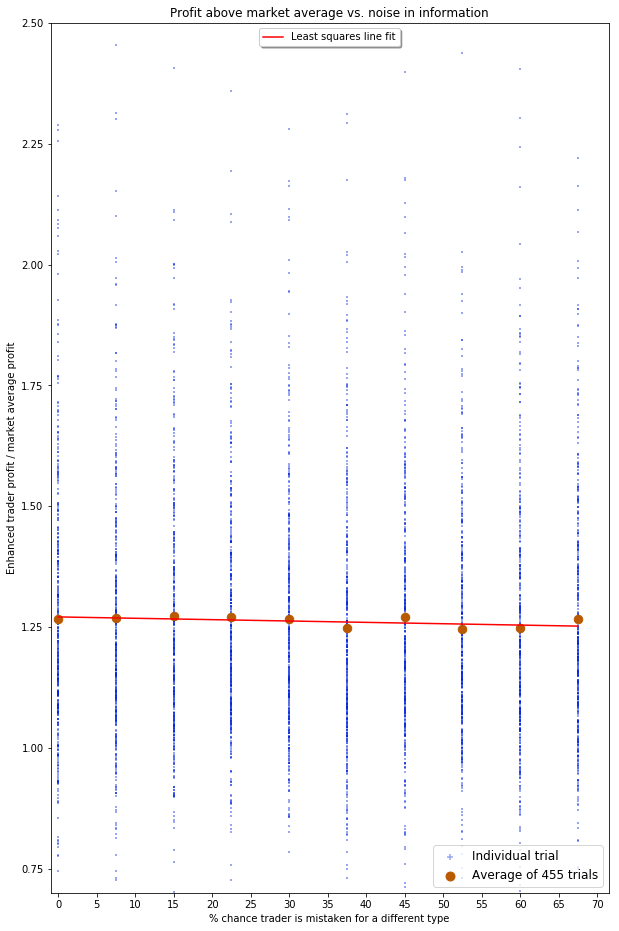

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
    
noise_coefficient = 0.75 * 10    
equal_line_x = [0, 75]
equal_line_y = [1, 1]

avg_extra_profit = [i / j for i, j in zip(avg_enhanced_profit, avg_all_profit)]
# type_sorted_ex_p = {}
# for t in types_without_spaces:
#     type_sorted_ex_p[t] = [i / j for i, j in zip(type_sorted_aep[t], type_sorted_aap[t])]


linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(avg_extra_profit.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 75*coeffs[0]]
coeff_line_x = [0, 75-7.5]
print(coeffs[1], coeffs[0])



plt.figure(figsize=(10,16))
plt.xticks(range(0,75,5))
plt.yticks(np.arange(0, 10, step=0.25))
sc_marker = '+'
sc_marker_size=4
x_values = [x * noise_coefficient for x in order_schedule_num]
y_values = [min(y,5) for y in avg_extra_profit]
averaged_y_values = []
averaged_x_values = [x * 7.5 for x in range(0,10)]
running_avg = 0
count = 0
for x in y_values:
    running_avg += x
    count += 1
    if count == 455:
        averaged_y_values.append(running_avg/count)
        count = 0
        running_avg = 0
        
dots = plt.scatter(x_values, y_values, sc_marker_size, marker=sc_marker, c='#0022dd66')
avg_dots = plt.scatter(averaged_x_values,   averaged_y_values,   72, c='#b95a00', marker='o')
# zip_dots = plt.scatter( type_sorted_osn['GDX'],  type_sorted_aep['GDX'],  sc_marker_size, c='#a900df', marker=sc_marker)
# gdx_dots = plt.scatter( type_sorted_osn['ZIP'],  type_sorted_aep['ZIP'],  sc_marker_size, c='#087e3e', marker=sc_marker)
# snpr_dots = plt.scatter(type_sorted_osn['SNPR'], type_sorted_aep['SNPR'], sc_marker_size, c='#ff0000', marker=sc_marker)
plt.title("Profit above market average vs. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=0.7, top=2.5)
plt.xlim(left=-1)
# plt.plot(equal_line_x, equal_line_y, c="g")

# Add legend
lgnd = plt.legend((dots, avg_dots),
            ('Individual trial', 'Average of 455 trials'), fontsize = 12, loc='lower right')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [80]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
ax = plt.subplot(111)
# ax.plot(coeff_line_x, coeff_line_y, label='Noisy information line fit', c="#444444")
#ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',     c='#aaaaaa')
ax.plot(coeff_line_x, coeff_line_y, c='r', label='Least squares line fit')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.add_artist(lgnd)
plt.show()
    
    

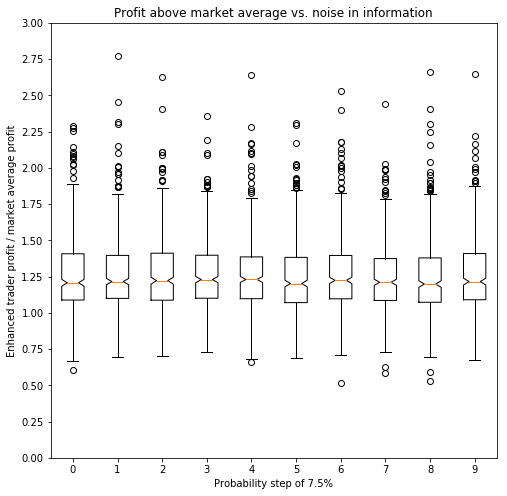

In [48]:
plt.figure(figsize=(8,8))
plt.xticks(range(0,75,5))
plt.yticks(np.arange(0, 10, step=0.25))
sc_marker = '+'
sc_marker_size=4
x_values = [x * noise_coefficient for x in order_schedule_num]
y_values = [min(y,5) for y in avg_extra_profit]
averaged_y_values = []
averaged_x_values = [x * 7.5 for x in range(0,10)]
running_avg = 0
count = 0
for x in y_values:
    running_avg += x
    count += 1
    if count == 455:
        averaged_y_values.append(running_avg/count)
        count = 0
        running_avg = 0
        
#dots = plt.scatter(x_values, y_values, sc_marker_size, marker=sc_marker, c='#0022dd66')
#avg_dots = plt.scatter(averaged_x_values,   averaged_y_values,   72, c='#b95a00', marker='o')
plt.title("Profit above market average vs. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("Probability step of 7.5%")
plt.ylim(bottom=0, top=3)
plt.xlim(left=-1)
boxes = []
for i in range(0,10):
    boxes.append(avg_extra_profit[i*455:(i+1)*455])
boxprobs = [x for x in range(0,10)]
boxp = plt.boxplot(boxes, positions=boxprobs, notch=True)

# Add legend
ax = plt.subplot(111)
ax.plot(coeff_line_x, coeff_line_y, c='r', label='Least squares line fit')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

1.2453000605763713 -0.00024213652319299454


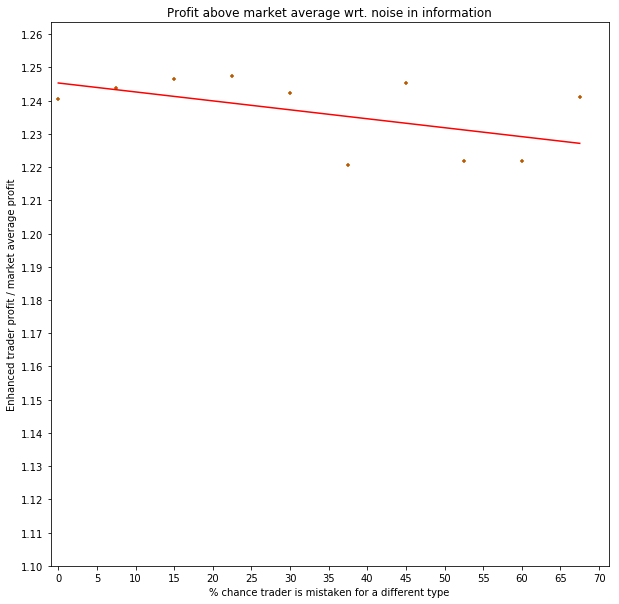

In [5]:
schedule_averaged_x = []
schedule_averaged_y = []
# Average every 455 trials - same schedule, same noise, for easier display
for schedule_id in range(0, 10):
    aep_avg  = 0
    aap_avg  = 0
    for ratio in range(0, 455):
        aap_avg += avg_all_profit[(schedule_id * 455) + ratio]
        aep_avg += avg_enhanced_profit[(schedule_id * 455) + ratio]
    if (aap_avg != 0):
        schedule_averaged_x.append(schedule_id * noise_coefficient)
        schedule_averaged_y.append((aep_avg / aap_avg))
        
linreg_array_x = np.array(schedule_averaged_x.copy())
linreg_array_y = np.array(schedule_averaged_y.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 75*coeffs[0]]
coeff_line_x = [0, 75-7.5]
print(coeffs[1], coeffs[0])

plt.figure(figsize=(10,10))
plt.xticks(range(0,80,5))
plt.yticks(np.arange(0, 3, step=0.01))
sc_marker = '+'
sc_marker_size=24
dots = plt.scatter( schedule_averaged_x, schedule_averaged_y, sc_marker_size, c='#b95a00', marker=sc_marker)
plt.title("Profit above market average wrt. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=1.1)
plt.xlim(left=-1)
# plt.axes().set_aspect('equal', 'box')
plt.plot(coeff_line_x, coeff_line_y, c='r')
# Add legend
# lgnd = plt.legend((aa_dots, zip_dots, gdx_dots, snpr_dots),
#            ('AA', 'GDX', 'ZIP', 'SNPR'), fontsize = 12)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
# ax = plt.subplot(111)
# ax.plot(coeff_line_x, coeff_line_y, label='Dominant strategy average', c="#444444")
# ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',    c='#aaaaaa')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
# ax.add_artist(lgnd)
plt.show()

277.7818181818182 0.2957575757575774


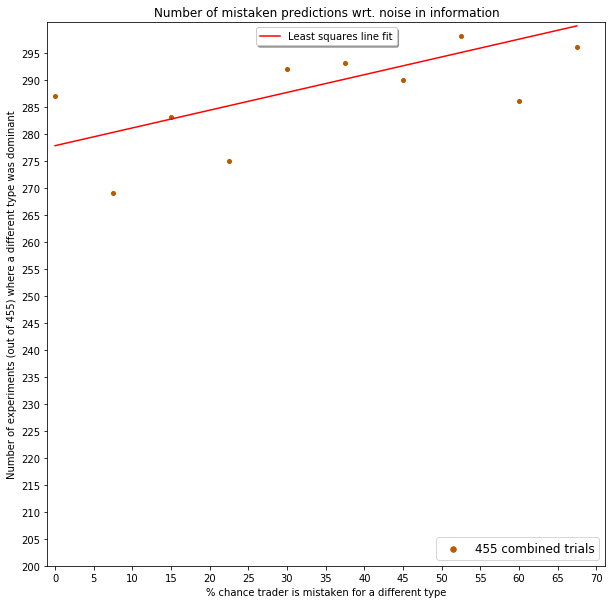

In [21]:
bad_predictions = [x for x,y in zip(enhanced_types, best_trial_types) if x != y]
bad_prediction_ids = []
good_predictions = [x for x,y in zip(enhanced_types, best_trial_types) if x == y]
for i in range(0, len(enhanced_types)):
    if enhanced_types[i]!= best_trial_types[i]:
        bad_prediction_ids.append(i)
bad_prediction_enhanced_profits = [avg_enhanced_profit[x] for x in bad_prediction_ids]
# bad_prediction_all_profits = [avg_all_profit[x] for x in bad_prediction_ids]
# bad_prediction_real_best_profits = [real_best_profit[x] for x in bad_prediction_ids]
diff_after_prediction = [a - b for a,b in zip(real_best_profit, avg_enhanced_profit)]
bad_prediction_diffs =  [diff_after_prediction[x] for x in bad_prediction_ids]
bad_prediction_probs = [(x // 455) * 0.75 *10 for x in bad_prediction_ids]
bad_pred_xs = np.array(np.unique(bad_prediction_probs))
bad_pred_ys = [bad_prediction_probs.count(x) for x in bad_pred_xs]


linreg_array_x = np.array(bad_pred_xs.copy())
linreg_array_y = np.array(bad_pred_ys.copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 2)
coeff_line_y = [coeffs[2], coeffs[2] + 75*coeffs[1]]
coeff_line_x = [0, 75-7.5]
print(coeffs[2], coeffs[1])

plt.figure(figsize=(10,10))
plt.xticks(range(0,80,5))
plt.yticks(range(150,300,5))
# plt.yticks(np.arange(0, 3, step=0.1))
sc_marker = 'o'
sc_marker_size=4
dots = plt.scatter( bad_pred_xs, bad_pred_ys, 16, c='#b95a00', marker=sc_marker)
lgnd = plt.legend([dots],
           ['455 combined trials'], fontsize = 12, loc='lower right')
lgnd.legendHandles[0]._sizes = [30]
plt.title("Number of mistaken predictions wrt. noise in information")
plt.ylabel("Number of experiments (out of 455) where a different type was dominant")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=200)
plt.xlim(left=-1)
# plt.axes().set_aspect('equal', 'box')
# plt.plot(coeff_line_x, coeff_line_y, c='r')
ax = plt.subplot(111)
# ax.plot(coeff_line_x, coeff_line_y, label='Dominant strategy average', c="#444444")
# ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',    c='#aaaaaa')
ax.plot(coeff_line_x, coeff_line_y, c='r', label='Least squares line fit')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.add_artist(lgnd)
plt.show()

40.315070341423244 -0.0007422120363289236
50.20437833798597 -0.010669693394782435


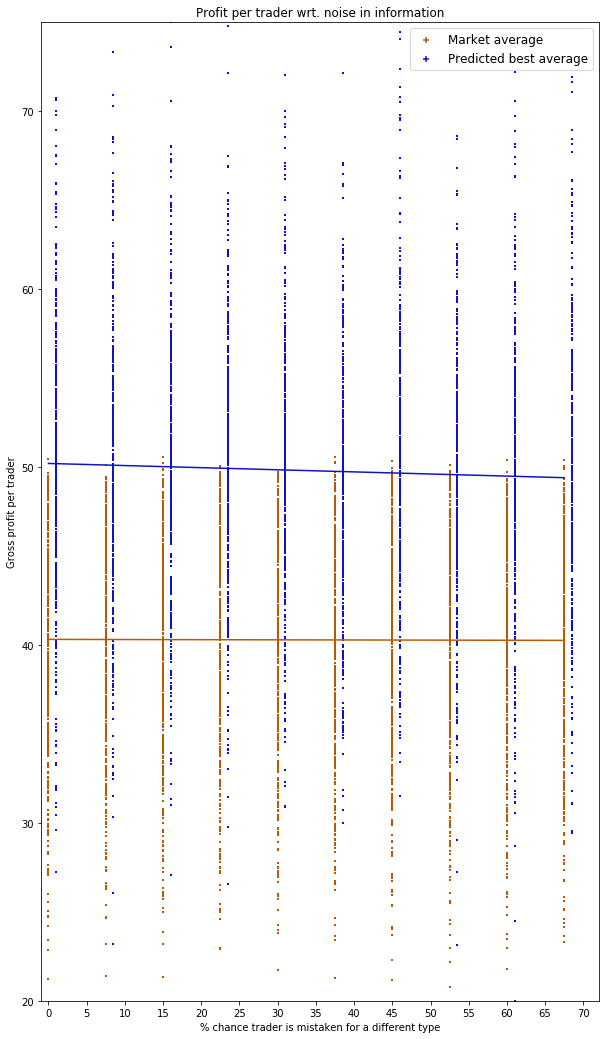

In [7]:
linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(avg_all_profit.copy())
market_avg_coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
market_avg_coeff_line_y = [market_avg_coeffs[1], market_avg_coeffs[1] + 75*market_avg_coeffs[0]]
market_avg_coeff_line_x = [0, 75-7.5]
print(market_avg_coeffs[1], market_avg_coeffs[0])
linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(avg_enhanced_profit.copy())
enhanced_avg_coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
enhanced_avg_coeff_line_y = [enhanced_avg_coeffs[1], enhanced_avg_coeffs[1] + 75*enhanced_avg_coeffs[0]]
enhanced_avg_coeff_line_x = [0, 75-7.5]
print(enhanced_avg_coeffs[1], enhanced_avg_coeffs[0])

plt.figure(figsize=(10,18))
plt.xticks(range(0,75,5))
# plt.yticks(np.arange(0, 3, step=0.1))
sc_marker = '+'
sc_marker_size=2
base_profit_dots = plt.scatter([x * noise_coefficient for x in order_schedule_num], avg_all_profit, sc_marker_size, c='#b95a00', marker=sc_marker)
enhanced_profit_dots =  plt.scatter(np.add(1, [x * noise_coefficient for x in order_schedule_num]), avg_enhanced_profit, sc_marker_size, c='#1111cc', marker=sc_marker)
plt.title("Profit per trader wrt. noise in information")
plt.ylabel("Gross profit per trader")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=20, top=75)
plt.xlim(left=-1)
# plt.axes().set_aspect('equal', 'box')
plt.plot(enhanced_avg_coeff_line_x, enhanced_avg_coeff_line_y, c='#1111cc')
plt.plot(market_avg_coeff_line_x, market_avg_coeff_line_y, c='#b95a00')
# ax = plt.subplot(111)

lgnd = plt.legend((base_profit_dots, enhanced_profit_dots),
            ('Market average', 'Predicted best average'), fontsize = 12)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.show()

max noise p value:  0.9355310125635915
max noise avg profit p value: 0.40247494876456325
pvalues enhanced:  [0.9301482034617249, 0.9063921292792072, 0.4015746678825509, 0.9678811879516556, 0.047686359010408956, 0.71147519299075, 0.037794553933455266, 0.09026225593117905, 0.9355310125635915]
[ 0.   7.5 15.  22.5 30.  37.5 45.  52.5 60.  67.5]


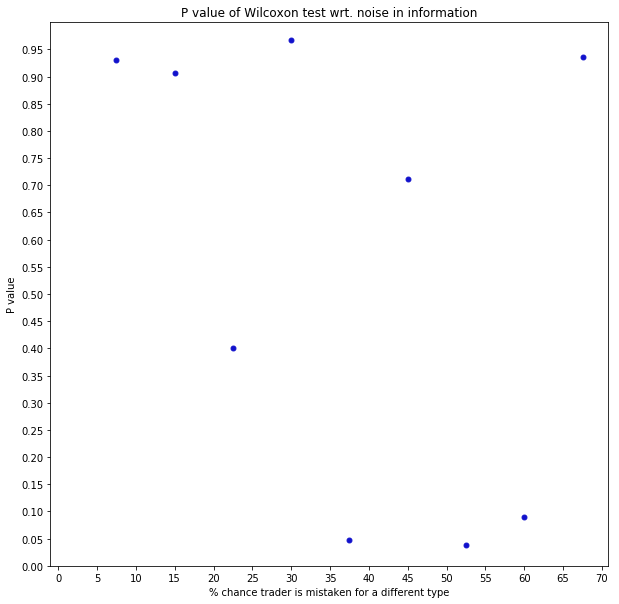

In [27]:
# Statistical significance tests
# Nonparametric Wilcoxon-Mann-Whitney test: are the two (0 noise and max noise) distributions from the same population?
import scipy

p_enhanced_values = []
for i in range(1,10):
    t_enhanced, pvalue_enhanced = scipy.stats.wilcoxon(avg_enhanced_profit[:455],avg_enhanced_profit[(i*455):((i+1)*455)], zero_method='wilcox')
    p_enhanced_values.append(pvalue_enhanced)
t_enhanced, pvalue_enhanced = scipy.stats.wilcoxon(avg_enhanced_profit[:455],avg_enhanced_profit[4095:], zero_method='wilcox')
print("max noise p value: ", pvalue_enhanced)
t_all, pvalue_all = scipy.stats.wilcoxon(avg_all_profit[:455], avg_all_profit[(len(avg_all_profit)-455):], zero_method='wilcox', correction=False)
print("max noise avg profit p value:", pvalue_all)
print("pvalues enhanced: ", p_enhanced_values)
print(bad_pred_xs)

plt.figure(figsize=(10,10))
plt.xticks(range(0,75,5))
plt.yticks(np.arange(0, 1, step=0.05))
# plt.yticks(np.arange(0, 3, step=0.1))
sc_marker = 'o'
sc_marker_size=24
enhanced_profit_dots =  plt.scatter(bad_pred_xs[1:], p_enhanced_values, sc_marker_size, c='#1111cc', marker=sc_marker)
plt.title("P value of Wilcoxon test wrt. noise in information")
plt.ylabel("P value")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=0, top=1)
plt.xlim(left=-1)
# plt.axes().set_aspect('equal', 'box')
# plt.plot(enhanced_avg_coeff_line_x, enhanced_avg_coeff_line_y, c='#1111cc')
# plt.plot(market_avg_coeff_line_x, market_avg_coeff_line_y, c='#b95a00')
# ax = plt.subplot(111)

# lgnd = plt.legend((base_profit_dots, enhanced_profit_dots),
#             ('Market average', 'Predicted best average'), fontsize = 12)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
plt.show()